In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [2]:
df = pd.read_excel('C:/Users/Эдуард/Desktop/задание кафедры/train.xlsx')

In [3]:
df_test = pd.read_excel('C:/Users/Эдуард/Desktop/задание кафедры/test.xlsx')

In [17]:
df.head()

,Materia,"Youngs modulus, GPa","Ultimate strength, GPa","Yield strength, GPa","Hardness, HB","Melting temperature, K","Density, kg/dm^3","Capacity, J/kg*K"
0,022Cr19Ni10,191.55,0.913,0.230,175.0,1426.5,7.930,490.000
1,1.0722,200.00,0.565,0.235,130.0,1520.0,7.850,440.000
2,10SPb20,200.00,0.560,0.235,130.5,1520.0,7.850,440.000
3,11SMnPb30,205.00,0.590,0.333,173.5,1520.0,7.825,450.000
4,17-4 PH,168.00,0.977,0.848,229.0,1425.0,7.500,460.548


<AxesSubplot:>

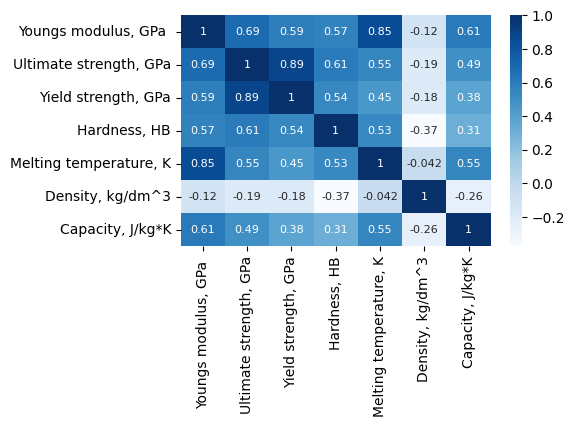

In [25]:
plt.figure(figsize=(5, 3))
sns.heatmap(df.corr(), cmap='Blues', annot=True, annot_kws={'fontsize': 8})

In [6]:
df['Density, kg/dm^3'] = df['Density, kg/dm^3'].fillna(df['Density, kg/dm^3'].median())
df['Capacity, J/kg*K'] = df['Capacity, J/kg*K'].fillna(df['Capacity, J/kg*K'].median())
df_test['Density, kg/dm^3'] = df_test['Density, kg/dm^3'].fillna(df_test['Density, kg/dm^3'].median())
df_test['Capacity, J/kg*K'] = df_test['Capacity, J/kg*K'].fillna(df_test['Capacity, J/kg*K'].median())

In [7]:
train_x = df.drop(['Hardness, HB', 'Materia', 'Density, kg/dm^3', 'Ultimate strength, GPa', 'Melting temperature, K'], axis=1)
train_y = df['Hardness, HB']
test_y = df_test['Hardness, HB']
test_x = df_test.drop(['Hardness, HB', 'Materia', 'Density, kg/dm^3', 'Ultimate strength, GPa', 'Melting temperature, K'], axis=1)

In [8]:
scaler = MinMaxScaler()
x_train_normilized = scaler.fit_transform(train_x)
x_test_normilized = scaler.transform(test_x)
y_train_normilized = scaler.fit_transform(train_y.values.reshape(-1, 1))
y_test_normilized = scaler.transform(test_y.values.reshape(-1, 1))

# Модель и обучение

In [9]:
train_x.shape

(124, 3)

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, input_dim=x_train_normilized.shape[1], activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [11]:
model.fit(x_train_normilized, y_train_normilized, batch_size=1, epochs=180, validation_data=(x_test_normilized, y_test_normilized))

Epoch 1/200
124/124 [==============================] - 1s 3ms/step - loss: 0.1124 - mean_absolute_error: 0.2455 - val_loss: 0.0171 - val_mean_absolute_error: 0.1035
Epoch 2/200
124/124 [==============================] - 0s 2ms/step - loss: 0.0260 - mean_absolute_error: 0.1206 - val_loss: 0.0267 - val_mean_absolute_error: 0.1333
Epoch 3/200
124/124 [==============================] - 0s 2ms/step - loss: 0.0243 - mean_absolute_error: 0.1160 - val_loss: 0.0220 - val_mean_absolute_error: 0.1087
Epoch 4/200
124/124 [==============================] - 0s 1ms/step - loss: 0.0216 - mean_absolute_error: 0.1086 - val_loss: 0.0232 - val_mean_absolute_error: 0.1128
Epoch 5/200
124/124 [==============================] - 0s 2ms/step - loss: 0.0226 - mean_absolute_error: 0.1138 - val_loss: 0.0149 - val_mean_absolute_error: 0.0827
Epoch 6/200
124/124 [==============================] - 0s 2ms/step - loss: 0.0210 - mean_absolute_error: 0.1036 - val_loss: 0.0216 - val_mean_absolute_error: 0.1006
Epoch 7/20

124/124 [==============================] - 0s 1ms/step - loss: 0.0180 - mean_absolute_error: 0.0995 - val_loss: 0.0150 - val_mean_absolute_error: 0.0804
Epoch 51/200
124/124 [==============================] - 0s 1ms/step - loss: 0.0173 - mean_absolute_error: 0.0971 - val_loss: 0.0184 - val_mean_absolute_error: 0.1008
Epoch 52/200
124/124 [==============================] - 0s 1ms/step - loss: 0.0172 - mean_absolute_error: 0.0957 - val_loss: 0.0160 - val_mean_absolute_error: 0.0885
Epoch 53/200
124/124 [==============================] - 0s 1ms/step - loss: 0.0175 - mean_absolute_error: 0.0980 - val_loss: 0.0100 - val_mean_absolute_error: 0.0672
Epoch 54/200
124/124 [==============================] - 0s 1ms/step - loss: 0.0194 - mean_absolute_error: 0.1021 - val_loss: 0.0182 - val_mean_absolute_error: 0.0961
Epoch 55/200
124/124 [==============================] - 0s 1ms/step - loss: 0.0184 - mean_absolute_error: 0.1009 - val_loss: 0.0105 - val_mean_absolute_error: 0.0694
Epoch 56/200
124/

124/124 [==============================] - 0s 1ms/step - loss: 0.0145 - mean_absolute_error: 0.0908 - val_loss: 0.0131 - val_mean_absolute_error: 0.0691
Epoch 100/200
124/124 [==============================] - 0s 1ms/step - loss: 0.0155 - mean_absolute_error: 0.0907 - val_loss: 0.0130 - val_mean_absolute_error: 0.0738
Epoch 101/200
124/124 [==============================] - 0s 1ms/step - loss: 0.0146 - mean_absolute_error: 0.0899 - val_loss: 0.0144 - val_mean_absolute_error: 0.0831
Epoch 102/200
124/124 [==============================] - 0s 1ms/step - loss: 0.0153 - mean_absolute_error: 0.0895 - val_loss: 0.0107 - val_mean_absolute_error: 0.0662
Epoch 103/200
124/124 [==============================] - 0s 2ms/step - loss: 0.0151 - mean_absolute_error: 0.0922 - val_loss: 0.0096 - val_mean_absolute_error: 0.0675
Epoch 104/200
124/124 [==============================] - 0s 1ms/step - loss: 0.0156 - mean_absolute_error: 0.0923 - val_loss: 0.0115 - val_mean_absolute_error: 0.0673
Epoch 105/20

124/124 [==============================] - 0s 1ms/step - loss: 0.0136 - mean_absolute_error: 0.0866 - val_loss: 0.0148 - val_mean_absolute_error: 0.0738
Epoch 149/200
124/124 [==============================] - 0s 1ms/step - loss: 0.0129 - mean_absolute_error: 0.0865 - val_loss: 0.0195 - val_mean_absolute_error: 0.0802
Epoch 150/200
124/124 [==============================] - 0s 2ms/step - loss: 0.0131 - mean_absolute_error: 0.0863 - val_loss: 0.0114 - val_mean_absolute_error: 0.0723
Epoch 151/200
124/124 [==============================] - 0s 1ms/step - loss: 0.0127 - mean_absolute_error: 0.0845 - val_loss: 0.0102 - val_mean_absolute_error: 0.0729
Epoch 152/200
124/124 [==============================] - 0s 1ms/step - loss: 0.0130 - mean_absolute_error: 0.0882 - val_loss: 0.0122 - val_mean_absolute_error: 0.0730
Epoch 153/200
124/124 [==============================] - 0s 1ms/step - loss: 0.0122 - mean_absolute_error: 0.0830 - val_loss: 0.0105 - val_mean_absolute_error: 0.0720
Epoch 154/20

124/124 [==============================] - 0s 1ms/step - loss: 0.0120 - mean_absolute_error: 0.0818 - val_loss: 0.0125 - val_mean_absolute_error: 0.0760
Epoch 198/200
124/124 [==============================] - 0s 2ms/step - loss: 0.0115 - mean_absolute_error: 0.0791 - val_loss: 0.0154 - val_mean_absolute_error: 0.0824
Epoch 199/200
124/124 [==============================] - 0s 1ms/step - loss: 0.0117 - mean_absolute_error: 0.0841 - val_loss: 0.0111 - val_mean_absolute_error: 0.0777
Epoch 200/200
124/124 [==============================] - 0s 1ms/step - loss: 0.0123 - mean_absolute_error: 0.0872 - val_loss: 0.0172 - val_mean_absolute_error: 0.0844


In [12]:
print(f'Mean test error: {round(round(metrics.mean_absolute_error(scaler.inverse_transform(y_test_normilized), scaler.inverse_transform(model.predict(x_test_normilized))), 2)*100/round(test_y.mean(), 2), 2)}%')

1/1 [==============================] - 0s 89ms/step
Mean test error: 23.85%


In [13]:
print(f'Mean train error: {round(round(metrics.mean_absolute_error(scaler.inverse_transform(y_train_normilized), scaler.inverse_transform(model.predict(x_train_normilized))), 2)*100/round(train_y.mean(), 2), 2)}%')

4/4 [==============================] - 0s 1ms/step
Mean train error: 19.54%


In [14]:
model.save('C:/Users/Эдуард/Desktop/задание кафедры/models/model10')

INFO:tensorflow:Assets written to: C:/Users/Эдуард/Desktop/задание кафедры/models/model10\assets


In [15]:
scaler.inverse_transform(y_test_normilized[0:1])[0][0]

187.00000000000003

In [16]:
scaler.inverse_transform(model.predict(x_test_normilized[0:1]))[0][0]

1/1 [==============================] - 0s 17ms/step


159.79848